In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

# LVQ

Tugas Praktikan adalah melakukan modifikasi kode untuk algoritma lain dari LVQ yaitu LVQ2 dan LVQ2.1.




## Kode

LVQ

In [2]:
#Tidak perlu diubah
def lvq_fit(train, target, lrate, b, max_epoch):
  label, train_idx = np.unique(target, return_index=True)
  weight = train[train_idx].astype(np.float64)
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
  train, target = train[:, 0], train[:, 1]
  epoch = 0

  while epoch < max_epoch:
    for i, x in enumerate(train):
      distance = [sum((w - x) ** 2) for w in weight]
      min = np.argmin(distance)
      sign = 1 if target[i] == label[min] else -1
      weight[min] += sign * lrate * (x - weight[min])
    lrate *= b
    epoch += 1

  return weight, label

LVQ2

In [23]:
def lvq2_fit(train, target, lrate, b, max_epoch, epsilon):
  label, train_idx = np.unique(target, return_index=True)
  weight = train[train_idx].astype(np.float64)
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
  train, target = train[:, 0], train[:, 1]
  epoch = 0

  while epoch < max_epoch:
    for i, x in enumerate(train):
      distance = [sum((w - x) ** 2) for w in weight]
      distance = np.array(distance)
      min_indices = np.argpartition(distance,1)[:2]
      min_values = distance[min_indices]
      sorted_min_indices = min_indices[np.argsort(min_values)]
      c = sorted_min_indices[0] #Terdekat
      r = sorted_min_indices[1] #Kedua Terdekat
      #Buat kode perubahan bobot untuk LVQ2
      if target[i] == label[c]:
        weight[c] += lrate * (x - weight[c])
      elif target[i] != label[c] and target[i] == label[r]:

      #pengecekan rasio jarak terdekat dengan jarak kedua terdekat terhadap epsilon
        #pengecekan bahwa label terdekat tidak sama dengan target
        if distance[c] / distance[r] > (1 - epsilon) / (1 + epsilon):
          #pengecekan bahwa label kedua terdekat bernilai sama dengan target
          if target[i] != label[c] and target[i] != label[r]:
            #Update bobot untuk kelas terdekat dan kedua terdekat
            weight[c] -= lrate * (x - weight[c])
            weight[r] += lrate * (x - weight[r])



    lrate *= b
    epoch += 1

  return weight, label

LVQ2.1

In [27]:
def lvq21_fit(train, target, lrate, b, max_epoch, epsilon):
  label, train_idx = np.unique(target, return_index=True)
  weight = train[train_idx].astype(np.float64)
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
  train, target = train[:, 0], train[:, 1]
  epoch = 0

  while epoch < max_epoch:
    for i, x in enumerate(train):
      distance = [sum((w - x) ** 2) for w in weight]
      distance = np.array(distance)
      min_indices = np.argpartition(distance,1)[:2]
      min_values = distance[min_indices]
      sorted_min_indices = min_indices[np.argsort(min_values)]
      c1 = sorted_min_indices[0] #Terdekat
      c2 = sorted_min_indices[1] #Kedua Terdekat
      #Buat kode perubahan bobot untuk LVQ2

      #pengecekan rasio jarak terdekat dengan jarak kedua terdekat terhadap epsilon
      if (distance[c1]/distance[c2] > (1-epsilon)/(1+epsilon)):
        #pengecekan bahwa label terdekat sama dengan target
        if (target[i] == label[c1]):
          #Update bobot untuk kelas terdekat dan kedua terdekat
          weight[c1] += lrate * (x - weight[c1])
          weight[c2] += lrate * (x - weight[c2])



        #pengecekan bahwa label kedua terdekat sama dengan target
        elif (target[i] == label[c2]):

          #Update bobot untuk kelas terdekat dan kedua terdekat
          weight[c1] -= lrate * (x - weight[c1])
          weight[c2] -= lrate * (x - weight[c2])



    lrate *= b
    epoch += 1

  return weight, label

Fungsi Testing dan Hitung Akurasi


In [9]:
#Tidak perlu diubah
def lvq_predict(X, model):
  center, label = model
  Y = []
  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])
  return Y

def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

## Percobaan

Lakukan training LVQ dengan
- learning rate 0.5
- perubahan learning rate 0.8
- epoch maksimum 100
- epsilon 0.3

<ipython-input-2-51f39131c946>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Accuracy: 0.85


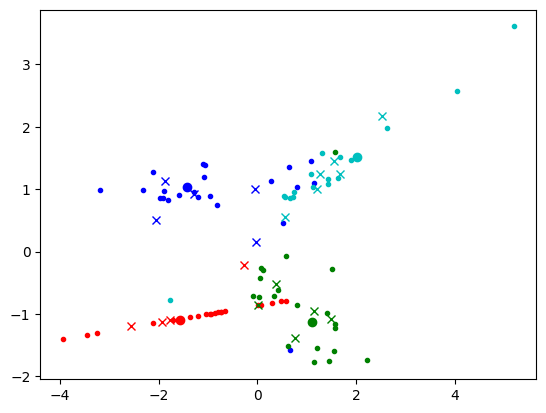

In [14]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_classes=4, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=0.5, b=0.5, max_epoch=100)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

<ipython-input-23-040e63c98491>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Accuracy: 0.7


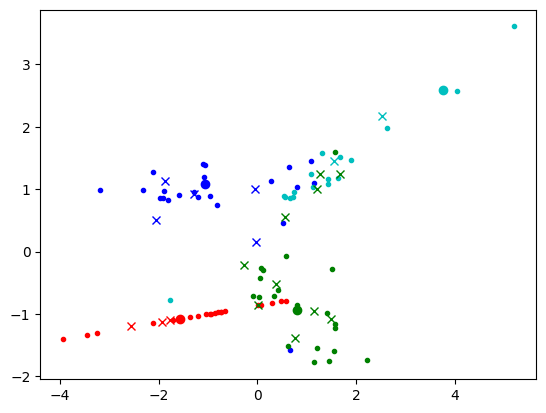

In [25]:
model = lvq2_fit(X_train, y_train, lrate=0.8, b=0.5, max_epoch=100, epsilon=0.3)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

<ipython-input-27-13b331dd8d14>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Accuracy: 0.15


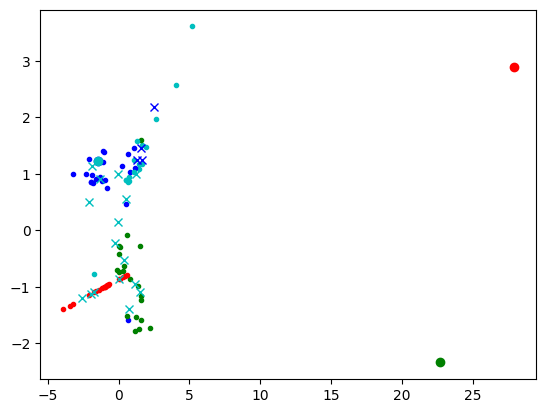

In [28]:
model = lvq21_fit(X_train, y_train, lrate=0.8, b=0.5, max_epoch=100, epsilon=0.3)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

# Analisis

Jelaskan hasil yang anda dapatkan!

jawab disini